https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873

In [1]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import folium

In [2]:
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north = 48.0081000, south = 48.0048000,
                        east = 7.8391000, west = 7.8357000, network_type = 'all')                      

C:\Users\Arved\AppData\Local\Temp\ipykernel_169420\882608263.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(north = 48.0081000, south = 48.0048000,


In [3]:
list(G.edges(data=True))[0]

(31404363,
 31404367,
 {'osmid': 111857038,
  'highway': 'service',
  'service': 'driveway',
  'oneway': False,
  'reversed': False,
  'length': 19.025})

In [4]:
# Create a map
m = folium.Map(location=[48.006, 7.837], zoom_start=10,
               zoom_control=False, scrollWheelZoom=False)
# Defining the map boundaries 
m.fit_bounds([[48.0048000, 7.8357000], [48.0081000, 7.8391000]])

In [7]:
# read car icon
car_icon = folium.features.CustomIcon('..\\Images\\Car Icon.jpeg', icon_size=(30, 30))
# include the car icon in the map
folium.Marker([list(G.nodes(data=True))[0][1]['y'],list(G.nodes(data=True))[0][1]['x']], icon=car_icon).add_to(m)

C:\Users\Arved\AppData\Local\Temp\ipykernel_169420\2849202288.py:2: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', color='gray')



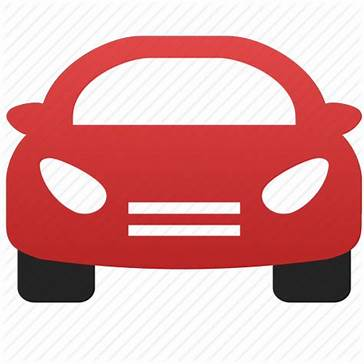
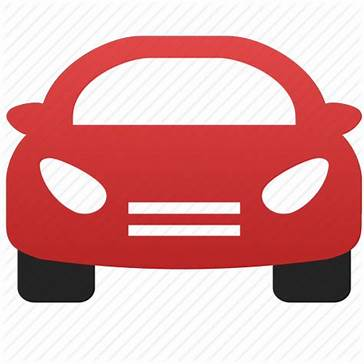

In [8]:
# plot the graph on the map
ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', color='gray')

C:\Users\Arved\AppData\Local\Temp\ipykernel_169420\1832328589.py:4: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', color='gray')
C:\Users\Arved\AppData\Local\Temp\ipykernel_169420\1832328589.py:5: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.folium.p


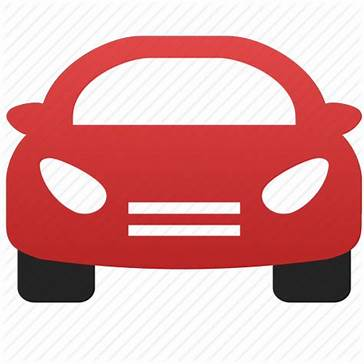
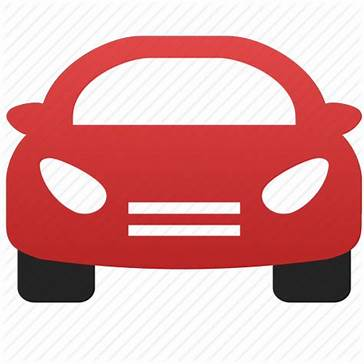

In [9]:
# calculate shortest path
sp = nx.shortest_path(G, list(G.nodes())[0], list(G.nodes())[-1], weight='length')
# plot the shortest path
ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', color='gray')
ox.folium.plot_route_folium(G, route=sp, route_map=m, popup_attribute='osmid', color='red')